In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
sample_data = pd.read_csv('survey.csv', sep=';')

In [4]:
sample_data

,Gender,Age,KmBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,KmAfter,KgAfter,TimeAfter,SideEffects
0,F,32,4.06,74.7,41.2,No,No,No,4.37,91.8,61.1,N
1,M,37,3.96,76.3,43.9,Yes,Yes,No,3.09,89.6,69.7,N
2,M,43,3.80,91.7,47.9,Yes,No,No,6.26,92.7,49.8,N
3,F,26,5.17,75.4,59.6,No,No,No,5.81,89.1,60.9,N
4,F,36,3.72,77.0,54.9,No,Yes,Yes,7.80,91.7,60.7,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,39,5.69,77.5,39.3,No,No,Yes,5.41,85.8,61.0,Y
996,F,35,4.57,93.2,50.2,Yes,Yes,No,5.86,96.6,64.4,N
997,F,36,2.72,72.3,53.8,No,Yes,No,2.63,92.8,68.9,Y
998,M,32,3.92,98.7,56.2,No,Yes,No,6.31,86.0,62.3,N


## Check for missing values

In [5]:
# check for missing value
sample_data.isnull().sum()

Gender         0
Age            0
KmBefore       0
KgBefore       0
TimeBefore     0
Medicine1      0
Medicine2      0
Medicine3      0
KmAfter        0
KgAfter        0
TimeAfter      0
SideEffects    0
dtype: int64

In [6]:
# checking type of column
sample_data.dtypes

Gender          object
Age              int64
KmBefore       float64
KgBefore       float64
TimeBefore     float64
Medicine1       object
Medicine2       object
Medicine3       object
KmAfter        float64
KgAfter        float64
TimeAfter      float64
SideEffects     object
dtype: object

## Checking the object type columns

In [19]:
sample_data['Medicine1'].value_counts()

No     732
Yes    268
Name: Medicine1, dtype: int64

In [20]:
sample_data['Medicine2'].value_counts()

Yes    622
No     378
Name: Medicine2, dtype: int64

In [21]:
sample_data['Medicine3'].value_counts()

No     551
Yes    449
Name: Medicine3, dtype: int64

In [22]:
sample_data['SideEffects'].value_counts()

N    817
Y    183
Name: SideEffects, dtype: int64

In [23]:
sample_data['Gender'].value_counts()

M    553
F    447
Name: Gender, dtype: int64

In [24]:
np.min(sample_data['Age'])

19

In [25]:
np.max(sample_data['Age'])

50

## Data Summary

In [26]:
np.mean(sample_data['KmBefore'])

4.020629999999997

In [27]:
# Is every participant required to run 1 km more?
np.mean(sample_data['KmAfter'])

4.996929999999999

In [28]:
sample_data['DistanceDiff'] = sample_data['KmAfter'] - sample_data['KmBefore']
sample_data['WeightDiff'] = sample_data['KgAfter'] - sample_data['KgBefore']

In [29]:
#Participants ran more and less before and after
sample_data['DistanceDiff']

0      0.31
1     -0.87
2      2.46
3      0.64
4      4.08
       ... 
995   -0.28
996    1.29
997   -0.09
998    2.39
999    1.36
Name: DistanceDiff, Length: 1000, dtype: float64

In [30]:
np.mean(sample_data['DistanceDiff'])

0.9762999999999996

In [31]:
np.mean(sample_data['WeightDiff'])

9.555399999999986

## Box plots

In [32]:
import seaborn as sbn

<AxesSubplot:xlabel='Gender', ylabel='DistanceDiff'>

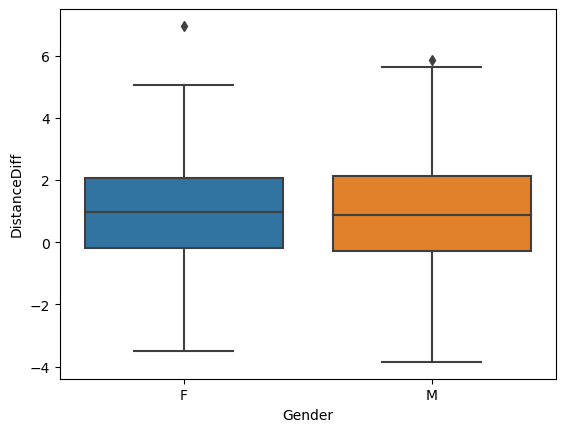

In [33]:
#visualizing distance difference
sbn.boxplot(x='Gender', y='DistanceDiff', data=sample_data)

In [36]:
sample_data['DistanceDiff'].describe()

count    1000.000000
mean        0.976300
std         1.635085
min        -3.850000
25%        -0.220000
50%         0.950000
75%         2.092500
max         6.960000
Name: DistanceDiff, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='WeightDiff'>

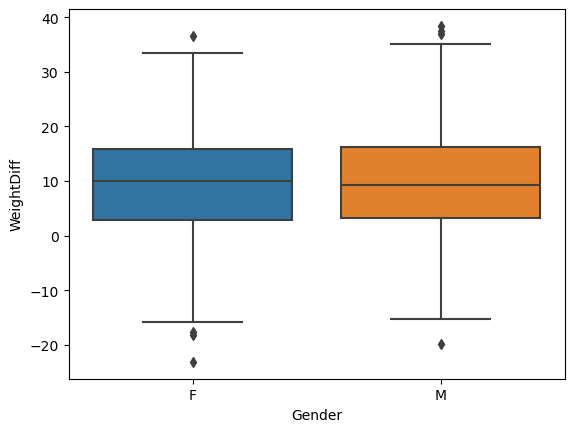

In [37]:
#visualizing weight difference
sbn.boxplot(x='Gender', y='WeightDiff', data=sample_data)

In [38]:
sample_data['WeightDiff'].describe()

count    1000.000000
mean        9.555400
std         9.572569
min       -23.100000
25%         3.000000
50%         9.800000
75%        16.000000
max        38.400000
Name: WeightDiff, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Age'>

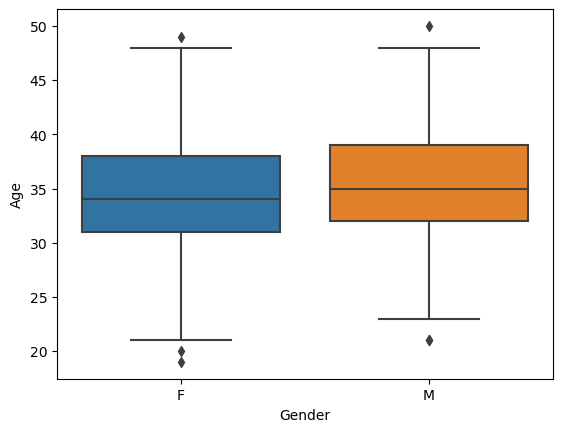

In [39]:
#visualizing age difference
sbn.boxplot(x='Gender', y='Age', data=sample_data)

In [40]:
sample_data['Age'].describe()

count    1000.000000
mean       34.794000
std         5.012453
min        19.000000
25%        31.000000
50%        35.000000
75%        38.000000
max        50.000000
Name: Age, dtype: float64

### Removing outliers

In [41]:
# dropping the outliers by order weight difference -> age difference
def remove_outliers_IQR(dataset, column_name):
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    dataset = dataset.drop(dataset[(dataset[column_name] > upper_bound) | (dataset[column_name] < lower_bound)].index)

    return dataset

new_data = remove_outliers_IQR(sample_data, 'WeightDiff')
new_data = remove_outliers_IQR(new_data, 'Age')
new_data

,Gender,Age,KmBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,KmAfter,KgAfter,TimeAfter,SideEffects,DistanceDiff,WeightDiff
0,F,32,4.06,74.7,41.2,No,No,No,4.37,91.8,61.1,N,0.31,17.1
1,M,37,3.96,76.3,43.9,Yes,Yes,No,3.09,89.6,69.7,N,-0.87,13.3
2,M,43,3.80,91.7,47.9,Yes,No,No,6.26,92.7,49.8,N,2.46,1.0
3,F,26,5.17,75.4,59.6,No,No,No,5.81,89.1,60.9,N,0.64,13.7
4,F,36,3.72,77.0,54.9,No,Yes,Yes,7.80,91.7,60.7,Y,4.08,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,39,5.69,77.5,39.3,No,No,Yes,5.41,85.8,61.0,Y,-0.28,8.3
996,F,35,4.57,93.2,50.2,Yes,Yes,No,5.86,96.6,64.4,N,1.29,3.4
997,F,36,2.72,72.3,53.8,No,Yes,No,2.63,92.8,68.9,Y,-0.09,20.5
998,M,32,3.92,98.7,56.2,No,Yes,No,6.31,86.0,62.3,N,2.39,-12.7


### Data modification

In [42]:
# I want the distances to be meter units
new_data['DistanceDiff'] = round(new_data['DistanceDiff'] * 1000, 0)
km_before = new_data['KmBefore']
time_before = new_data['TimeBefore']
km_after = new_data['KmAfter']
time_after = new_data['TimeAfter']
meter_before = round(km_before * 1000, 0)
meter_after = round(km_after * 1000, 0)
new_data['KmBefore'] = meter_before
new_data['KmAfter'] = meter_after
new_data = new_data.rename(columns={'KmBefore':'MeterBefore',
                                        'KmAfter':'MeterAfter',
                                        'TimeBefore':'MinBefore',
                                        'TimeAfter':'MinAfter'})

In [43]:
new_data

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1
1,M,37,3960.0,76.3,43.9,Yes,Yes,No,3090.0,89.6,69.7,N,-870.0,13.3
2,M,43,3800.0,91.7,47.9,Yes,No,No,6260.0,92.7,49.8,N,2460.0,1.0
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7
4,F,36,3720.0,77.0,54.9,No,Yes,Yes,7800.0,91.7,60.7,Y,4080.0,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3
996,F,35,4570.0,93.2,50.2,Yes,Yes,No,5860.0,96.6,64.4,N,1290.0,3.4
997,F,36,2720.0,72.3,53.8,No,Yes,No,2630.0,92.8,68.9,Y,-90.0,20.5
998,M,32,3920.0,98.7,56.2,No,Yes,No,6310.0,86.0,62.3,N,2390.0,-12.7


## Data Selection

In [44]:
# for distance difference, I want to eliminate all the participants
# who ran more than at least 20% of of their original distances.
mask = abs(new_data['DistanceDiff']) >= 0.20 * new_data['MeterBefore']
result = new_data[mask]

In [45]:
new_data = new_data.drop(result.index)
new_data

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7
5,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1
17,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8
18,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6
988,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8
991,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3


In [99]:
speed_before = round(new_data['MeterBefore']/new_data['MinBefore'], 2)
speed_after = round(new_data['MeterAfter']/new_data['MinAfter'], 2)

In [100]:
new_data.insert(14, 'SpeedBefore', speed_before, True)
new_data.insert(15, 'SpeedAfter', speed_after, True)

In [101]:
new_data

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff,SpeedBefore,SpeedAfter
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1,98.54,71.52
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7,86.74,95.40
5,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1,104.94,83.51
17,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8,106.79,72.64
18,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0,60.95,62.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6,107.78,68.17
988,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8,78.62,74.59
991,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6,103.51,69.93
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3,144.78,88.69


In [102]:
improved_speed = speed_after > speed_before
weight_loss = new_data['KgAfter'] < new_data['KgBefore']

In [103]:
new_data.insert(16, 'WeightLoss', weight_loss, True)
new_data.insert(17, 'ImprovedSpeed', improved_speed, True)

In [104]:
new_data

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff,SpeedBefore,SpeedAfter,WeightLoss,ImprovedSpeed
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1,98.54,71.52,False,False
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7,86.74,95.40,False,True
5,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1,104.94,83.51,True,False
17,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8,106.79,72.64,False,False
18,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0,60.95,62.64,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6,107.78,68.17,False,False
988,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8,78.62,74.59,False,False
991,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6,103.51,69.93,True,False
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3,144.78,88.69,False,False


In [105]:
weight_gain = new_data['KgAfter'] > new_data['KgBefore']
new_data.insert(18, 'WeightGain', weight_gain, True)

In [106]:
new_data

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff,SpeedBefore,SpeedAfter,WeightLoss,ImprovedSpeed,WeightGain
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1,98.54,71.52,False,False,True
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7,86.74,95.40,False,True,True
5,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1,104.94,83.51,True,False,False
17,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8,106.79,72.64,False,False,True
18,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0,60.95,62.64,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6,107.78,68.17,False,False,True
988,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8,78.62,74.59,False,False,True
991,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6,103.51,69.93,True,False,False
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3,144.78,88.69,False,False,True


In [107]:
new_data['WeightLoss'] = new_data['WeightLoss'].replace({True: 1, False: 0})
new_data['WeightGain'] = new_data['WeightGain'].replace({True: 1, False: 0})
new_data['ImprovedSpeed'] = new_data['ImprovedSpeed'].replace({True: 1, False: 0})
new_data['DistanceDiff'] = round(new_data['DistanceDiff'], 2)
new_data['WeightDiff'] = round(new_data['WeightDiff'], 2)

In [108]:
new_data

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff,SpeedBefore,SpeedAfter,WeightLoss,ImprovedSpeed,WeightGain
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1,98.54,71.52,0,0,1
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7,86.74,95.40,0,1,1
5,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1,104.94,83.51,1,0,0
17,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8,106.79,72.64,0,0,1
18,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0,60.95,62.64,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6,107.78,68.17,0,0,1
988,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8,78.62,74.59,0,0,1
991,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6,103.51,69.93,1,0,0
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3,144.78,88.69,0,0,1


In [109]:
df = pd.DataFrame(new_data)
df.to_csv('new_data.csv', index=False)